In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import warnings
from custom import custom_funcs as cf
from datetime import datetime
import random

warnings.filterwarnings('ignore')

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
#G = cf.load_seventh_grader_network()
#H = nx.read_gpickle('Synthetic Social Network.pkl')
G = nx.gnp_random_graph(100 , 0.05, seed=5001)
G = G.to_directed()

In [3]:
#G.nodes(data=True)

In [4]:
print(len(G.nodes()))

100


In [5]:
#G.edges(data=True)

In [6]:
#G.node[1]

In [7]:
#G.node[21]

In [8]:
#for n in G.nodes():
#    del G.node[n]

In [9]:
#G.nodes(data=True)

In [10]:
#G.node[21]['sex']

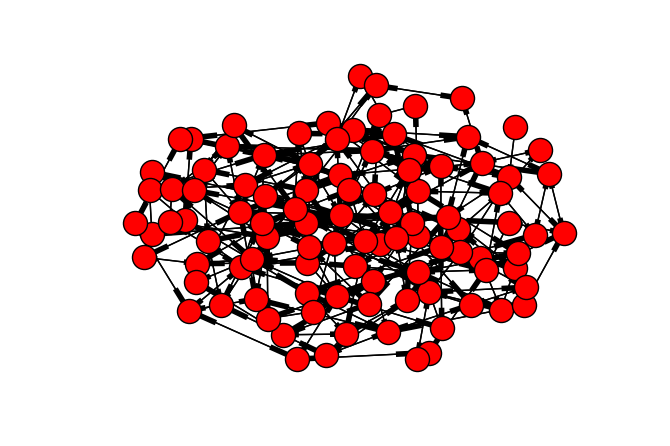

In [11]:
nx.draw(G)

In [12]:
#del G.node[21]['gender']

In [13]:
#G.edges()

In [14]:
#G = G.to_directed()

In [15]:
#nx.draw(G)

In [16]:
#G.edges()

In [17]:
#for n in G.nodes():
    #del G.node[n]['gender']
    #print(G.node.items())

In [18]:
#G.nodes(data=True)

In [19]:
import decimal
random.seed(9001)
for n in G.nodes():
    temp = round(random.uniform(0, 1), 3)
    G.add_node(n,ViRt=temp)

In [20]:
#G.nodes(data=True)

In [21]:
#for n in G.nodes():
#    del G.node[n]['gender']

In [22]:
#G.nodes(data=True)

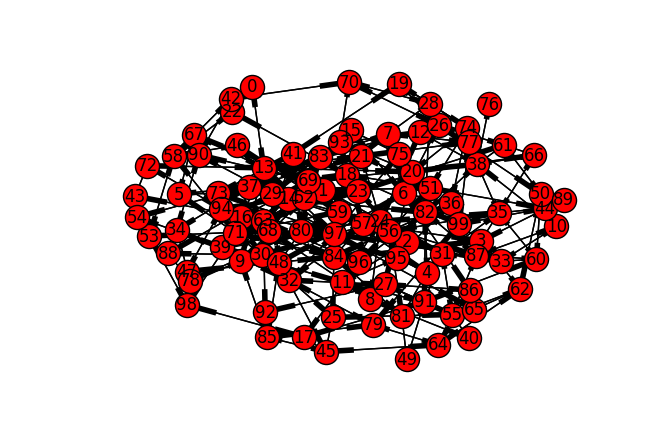

In [23]:
nx.draw(G, with_labels=True)

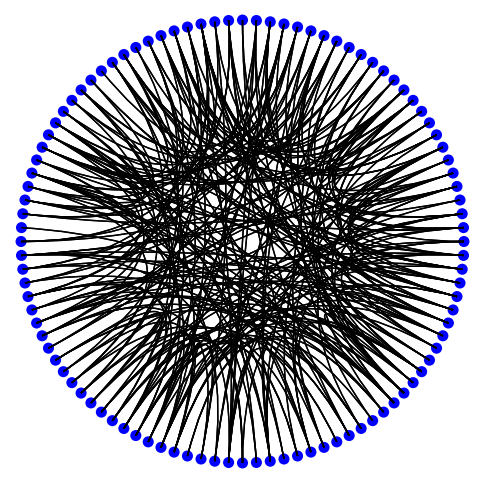

In [24]:
from circos import CircosPlot

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)

nodes = sorted(G.nodes())
edges = G.edges()
#node_cmap = {'Male':'blue', 'Female':'red'}
#nodecolors = [node_cmap[G.node[n]['sex']] for n in G.nodes()]

c = CircosPlot(nodes, edges, radius=10, ax=ax, fig=fig)
c.draw()  
plt.savefig('images/paper.jpg', dpi=300)

In [25]:
for n in G.nodes():
    frnds = len(G.neighbors(n))
    G.add_node(n,friends=frnds)

In [26]:
#G.nodes(data=True)

In [27]:
from random import randint
random.seed(9002)
for n in G.nodes():
    temp = randint(0,100)
    G.add_node(n,uploads=temp)

In [28]:
#G.nodes(data=True)

In [29]:
G.node[21]['friends']

6

In [30]:
G.node[21]['ViRt']

0.247

In [31]:
maxi_friends = 0
maxi_uploads = 0
for n in G.nodes():
    maxi_friends = max(maxi_friends, G.node[n]['friends'])
    maxi_uploads = max(maxi_uploads, G.node[n]['uploads'])

print(maxi_friends)
print(maxi_uploads)

12
99


In [32]:
import math
log_maxi_friends = math.log10(maxi_friends)
#log_maxi_friends = "%.3f" % log_maxi_friends
print(log_maxi_friends)
log_maxi_uploads = math.log10(maxi_uploads)
#log_maxi_uploads = "%.3f" % log_maxi_uploads
print(log_maxi_uploads)

1.0791812460476249
1.99563519459755


In [33]:
AttrCoeff = 0.0
for n in G.nodes():
    log_uploads = math.log10(1 + G.node[n]['uploads'])
    log_friends = math.log10(1 + G.node[n]['friends'])
    bias = math.log10(2)
    AttrCoeff = ((log_uploads + log_friends)/(log_maxi_uploads + log_maxi_friends + bias))
    AttrCoeff = round(AttrCoeff, 3)
    G.add_node(n,Attractiveness_Coeff=AttrCoeff)

In [34]:
G.nodes(data=True)

[(0,
  {'Attractiveness_Coeff': 0.602, 'ViRt': 0.037, 'friends': 2, 'uploads': 35}),
 (1,
  {'Attractiveness_Coeff': 0.799, 'ViRt': 0.253, 'friends': 5, 'uploads': 82}),
 (2,
  {'Attractiveness_Coeff': 0.74, 'ViRt': 0.564, 'friends': 6, 'uploads': 44}),
 (3,
  {'Attractiveness_Coeff': 0.816, 'ViRt': 0.569, 'friends': 6, 'uploads': 80}),
 (4,
  {'Attractiveness_Coeff': 0.609, 'ViRt': 0.606, 'friends': 5, 'uploads': 18}),
 (5,
  {'Attractiveness_Coeff': 0.708, 'ViRt': 0.513, 'friends': 4, 'uploads': 48}),
 (6,
  {'Attractiveness_Coeff': 0.754, 'ViRt': 0.713, 'friends': 7, 'uploads': 43}),
 (7,
  {'Attractiveness_Coeff': 0.815, 'ViRt': 0.893, 'friends': 5, 'uploads': 93}),
 (8,
  {'Attractiveness_Coeff': 0.734, 'ViRt': 0.616, 'friends': 3, 'uploads': 74}),
 (9,
  {'Attractiveness_Coeff': 0.782, 'ViRt': 0.538, 'friends': 5, 'uploads': 72}),
 (10,
  {'Attractiveness_Coeff': 0.653, 'ViRt': 0.759, 'friends': 4, 'uploads': 31}),
 (11,
  {'Attractiveness_Coeff': 0.513, 'ViRt': 0.981, 'friends':

In [35]:
#G.edges(data=True)

In [36]:
#for v1,v2,a in G.edges(data=True):
#    G[v1][v2]['count'] = 1

In [37]:
#G.edges(data=True)

In [38]:
import pandas as pd
import numpy as np
df = pd.read_excel("Video_Prop2.xlsx")
df.head()

,video ID,uploader,age,category,length,views,video rating(on a scale of 5),number of ratings,number of comments,Pi
0,bG-a5ZSdO2I,PhilipDeFranco,1125,Entertainment,73,21180,4.72,418,213,NaN
1,46wXWDiigE8,PhilipDeFranco,1120,Pets & Animals,36,12906,4.80,359,139,NaN
2,X5h6xg7BcbQ,PhilipDeFranco,1116,Entertainment,149,14477,4.76,462,182,NaN
3,VKavlhLlZHc,ditzystef,1122,People & Blogs,88,988,4.83,24,35,NaN
4,DgGZL_rAR8U,PhilipDeFranco,1115,Entertainment,516,22156,4.71,511,237,NaN


In [39]:
df.columns[[0, 2]]

Index(['video ID', 'age'], dtype='object')

In [40]:
df.drop(df.columns[[1,2,3,4,8,9]], axis=1, inplace=True)

In [41]:
df.head()

,video ID,views,video rating(on a scale of 5),number of ratings
0,bG-a5ZSdO2I,21180,4.72,418
1,46wXWDiigE8,12906,4.80,359
2,X5h6xg7BcbQ,14477,4.76,462
3,VKavlhLlZHc,988,4.83,24
4,DgGZL_rAR8U,22156,4.71,511


In [42]:
df.rename(columns={'video ID': 'id', 'views': 'nviews', 'video rating(on a scale of 5)': 'rating', 'number of ratings': 'nrating'}, inplace=True)

In [43]:
df.head()

,id,nviews,rating,nrating
0,bG-a5ZSdO2I,21180,4.72,418
1,46wXWDiigE8,12906,4.80,359
2,X5h6xg7BcbQ,14477,4.76,462
3,VKavlhLlZHc,988,4.83,24
4,DgGZL_rAR8U,22156,4.71,511


In [44]:
for a,b in df.iterrows():
    print(a,b)

0 id         bG-a5ZSdO2I
nviews           21180
rating            4.72
nrating            418
Name: 0, dtype: object
1 id         46wXWDiigE8
nviews           12906
rating             4.8
nrating            359
Name: 1, dtype: object
2 id         X5h6xg7BcbQ
nviews           14477
rating            4.76
nrating            462
Name: 2, dtype: object
3 id         VKavlhLlZHc
nviews             988
rating            4.83
nrating             24
Name: 3, dtype: object
4 id         DgGZL_rAR8U
nviews           22156
rating            4.71
nrating            511
Name: 4, dtype: object
5 id         CIm4ci3Y6iM
nviews           19370
rating            4.71
nrating            741
Name: 5, dtype: object
6 id         GOrNw5IeEB8
nviews           51416
rating            4.46
nrating            778
Name: 6, dtype: object
7 id         LyuwSEYBAPg
nviews          528109
rating            4.45
nrating           3688
Name: 7, dtype: object
8 id         wzs4NzyWVB0
nviews           15837
rating          

In [45]:
df.loc[df.nrating == 0, 'rating'] = 4
df.tail()

,id,nviews,rating,nrating
995,NWwrEEP8EBk,156873,4.38,326
996,pow5_UYKaJ8,157314,4.74,600
997,eQuIhJId1JY,265243,3.40,859
998,QF4CQeK91bk,25368,3.37,186
999,t2axP1lWFhg,125060,3.57,471


In [46]:
#for a,b in df.iterrows():
    #print(b)

In [47]:
ShRi = 0.0
random.seed(9003)
for n in G.nodes():
    ShRi = round(random.uniform(0, 1), 3)
    G.add_node(n,Sharing_Rate=ShRi)

In [48]:
#G.nodes(data=True)

In [49]:
df['iniviews'] = df['nviews']
df['eviews'] = df['nviews'] * 1.5
df['eviews'] = df['eviews'].apply(lambda x: int(x))

In [50]:
df.head(10)

,id,nviews,rating,nrating,iniviews,eviews
0,bG-a5ZSdO2I,21180,4.72,418,21180,31770
1,46wXWDiigE8,12906,4.80,359,12906,19359
2,X5h6xg7BcbQ,14477,4.76,462,14477,21715
3,VKavlhLlZHc,988,4.83,24,988,1482
4,DgGZL_rAR8U,22156,4.71,511,22156,33234
5,CIm4ci3Y6iM,19370,4.71,741,19370,29055
6,GOrNw5IeEB8,51416,4.46,778,51416,77124
7,LyuwSEYBAPg,528109,4.45,3688,528109,792163
8,wzs4NzyWVB0,15837,4.36,511,15837,23755
9,Z-ZP7Jt-RUM,16480,4.62,419,16480,24720


In [51]:
sorted([(n,G.neighbors(n)) for n in G.nodes()], key=lambda x: len(x[1]), reverse=True)

[(97, [32, 33, 37, 65, 73, 75, 13, 14, 18, 9, 25, 94]),
 (13, [0, 16, 67, 20, 21, 97, 72, 9, 14]),
 (37, [1, 18, 83, 5, 54, 97, 71, 34, 21]),
 (38, [82, 35, 69, 12, 74, 10, 76, 66, 61]),
 (80, [48, 2, 83, 52, 39, 24, 41, 78, 95]),
 (14, [97, 82, 30, 46, 59, 13, 94, 29]),
 (18, [97, 99, 21, 22, 56, 37, 69, 51]),
 (24, [80, 35, 21, 8, 11, 12, 30, 95]),
 (29, [48, 56, 83, 23, 88, 90, 14, 15]),
 (35, [24, 66, 3, 38, 56, 44, 60, 31]),
 (6, [48, 36, 86, 7, 26, 75, 15]),
 (23, [1, 2, 56, 61, 29, 94, 63]),
 (31, [33, 2, 35, 4, 69, 55, 91]),
 (48, [16, 80, 5, 6, 29, 45, 85]),
 (51, [96, 1, 2, 21, 74, 44, 18]),
 (55, [65, 87, 40, 25, 27, 62, 31]),
 (56, [81, 18, 35, 23, 57, 29, 95]),
 (69, [16, 18, 67, 38, 39, 90, 31]),
 (71, [32, 1, 98, 84, 37, 58, 59]),
 (82, [96, 4, 38, 87, 91, 28, 14]),
 (83, [80, 68, 37, 7, 26, 29, 15]),
 (84, [16, 81, 3, 36, 71, 57, 47]),
 (91, [17, 82, 11, 49, 27, 60, 31]),
 (2, [80, 51, 87, 23, 11, 31]),
 (3, [99, 35, 84, 89, 57, 62]),
 (21, [18, 51, 37, 24, 13, 77]),
 (

In [52]:
df.ix[8]

id          wzs4NzyWVB0
nviews            15837
rating             4.36
nrating             511
iniviews          15837
eviews            23755
Name: 8, dtype: object

In [53]:
random.seed(9004)
ShR_thr = 1.5
VwR_thr = 1
nodeSt = 0
rate = 0
pardaught = dict()
exclu = list()
connected = list()
queue = [nodeSt]
visited_nodes = set()
path = set()
connected.append(nodeSt)
for node in queue:
    if node == nodeSt:
        df.ix[8,'nviews'] += 1
        df.ix[8,'eviews'] += 1
        rate = randint(1,5)
        #df.ix[8,'rating'] += 1
        r = df.ix[8,'rating']
        df.ix[8,'rating'] = ((df.ix[8,'nrating'] * r) + rate)/float(df.ix[8,'nrating'] + 1)
        df.ix[8,'nrating'] += 1
        #print(G.node[node])
        neighbors = G.neighbors(node)
        #exclu = [n for n in neighbors if n not in visited_nodes]
        exclu = [n for n in neighbors if n not in connected]
        pardaught[node] = exclu
        connected.extend(exclu)
        #queue.remove(node)
        visited_nodes.add(node)
        path.add(node)
        queue.extend(exclu)
        df.ix[8,'eviews'] += len(neighbors)
        print(str(node) + " viewed & shared")
    else:
        for key, values in pardaught.items():
            if node in values:
                parent = key
        if VwR_thr <= (df.ix[8,'rating']*G.node[node]['ViRt']*G.node[parent]['Attractiveness_Coeff']):
            df.ix[8,'nviews'] += 1
            df.ix[8,'eviews'] += 1
            print(str(node) + " viewed")
            rate = randint(1,5)
            r = df.ix[8,'rating']
            df.ix[8,'rating'] = ((df.ix[8,'nrating'] * r) + rate)/float(df.ix[8,'nrating'] + 1)
            df.ix[8,'nrating'] += 1
        if ShR_thr <= (df.ix[8,'rating']*G.node[node]['Sharing_Rate']*G.node[parent]['Attractiveness_Coeff']):
            #print(G.node[node])
            neighbors = G.neighbors(node)
            exclu = [n for n in neighbors if n not in connected]
            pardaught[node] = exclu
            connected.extend(exclu)
            #queue.remove(node)
            visited_nodes.add(node)
            path.add(node)
            queue.extend(exclu)
            df.ix[8,'eviews'] += len(neighbors)
            print(str(node) + " shared")
#print(connected)

0 viewed & shared
13 viewed
13 shared
16 viewed
67 viewed
20 viewed
97 shared
9 viewed
32 viewed
32 shared
33 viewed
37 shared
65 viewed
65 shared
73 viewed
73 shared
75 viewed
18 viewed
18 shared
25 viewed
94 viewed
34 shared
71 shared
57 viewed
57 shared
27 viewed
79 shared
1 shared
83 viewed
5 viewed
5 shared
54 viewed
62 viewed
62 shared
55 viewed
99 viewed
99 shared
22 viewed
56 viewed
69 viewed
51 viewed
51 shared
78 viewed
98 viewed
98 shared
84 viewed
59 viewed
64 viewed
64 shared
23 viewed
48 shared
50 viewed
50 shared
36 viewed
44 viewed
96 shared
2 viewed
74 viewed
74 shared
17 viewed
53 shared
86 viewed
80 viewed
80 shared
6 viewed
6 shared
29 viewed
26 viewed
26 shared
60 viewed
61 shared
82 shared
19 viewed
38 viewed
38 shared
28 shared
68 viewed
68 shared
52 viewed
52 shared
39 viewed
7 viewed
7 shared
15 viewed
70 viewed
70 shared
66 viewed
66 shared
4 viewed
4 shared
87 shared
91 viewed
91 shared
35 viewed
10 viewed
76 viewed
8 viewed
31 viewed
81 shared
11 viewed
11 s

In [54]:
df.ix[8]

id          wzs4NzyWVB0
nviews            15898
rating          4.23594
nrating             572
iniviews          15837
eviews            24046
Name: 8, dtype: object

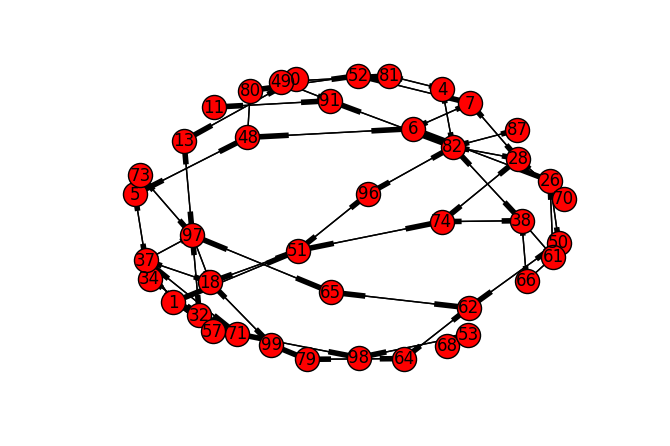

In [55]:
newG = G.subgraph(path)
nx.draw(newG, with_labels=True)

In [56]:
pardaught

{0: [42, 13],
 1: [23],
 4: [31, 81],
 5: [48],
 6: [7, 15],
 7: [],
 11: [],
 13: [16, 67, 20, 21, 97, 72, 9, 14],
 18: [99, 22, 56, 69, 51],
 26: [70],
 28: [],
 32: [34, 71, 57, 27, 79],
 34: [90, 78],
 37: [1, 83, 5, 54],
 38: [35, 12, 10, 76],
 48: [80, 6, 29],
 49: [],
 50: [26, 60, 61],
 51: [96, 2, 74],
 52: [],
 53: [68],
 57: [3, 93],
 61: [66],
 62: [50],
 64: [45, 86],
 65: [62, 55],
 66: [],
 68: [8],
 70: [],
 71: [98, 84, 58, 59],
 73: [41, 30],
 74: [19, 38, 28],
 79: [64, 85],
 80: [52, 39, 24, 95],
 81: [],
 82: [4, 87, 91],
 87: [],
 91: [11, 49],
 96: [82, 63],
 97: [32, 33, 37, 65, 73, 75, 18, 25, 94],
 98: [17, 53],
 99: [36, 44, 77]}

In [57]:
lst = list()
for key, values in pardaught.items():
    lst.extend(values)
print(lst)

[42, 13, 62, 55, 8, 17, 53, 7, 15, 98, 84, 58, 59, 45, 86, 41, 30, 19, 38, 28, 16, 67, 20, 21, 97, 72, 9, 14, 64, 85, 52, 39, 24, 95, 99, 22, 56, 69, 51, 31, 81, 70, 11, 49, 48, 34, 71, 57, 27, 79, 32, 33, 37, 65, 73, 75, 18, 25, 94, 90, 78, 36, 44, 77, 23, 1, 83, 5, 54, 35, 12, 10, 76, 4, 87, 91, 82, 63, 80, 6, 29, 26, 60, 61, 96, 2, 74, 68, 3, 93, 66, 50]


In [58]:
print(len(lst))
myset=set(lst)
print(len(myset))

92
92


In [59]:
#H = G.to_undirected()

In [60]:
#H.edges()

In [61]:
nx.shortest_path(G, 4, 14)

[4, 82, 14]

In [62]:
def path_exists(node1, node2, G):
    visited_nodes = set()
    queue = [node1]
    for node in queue:
        neighbors = G.neighbors(node)
        if node2 in neighbors:
            print('Path exists between nodes {0} and {1}'.format(node1, node2))
            return True
        else:
            queue.remove(node)
            visited_nodes.add(node)
            queue.extend([n for n in neighbors if n not in visited_nodes])
        if len(queue) == 0:
            print('Path does not exist between nodes {0} and {1}'.format(node1, node2))
            return False

In [63]:
def test_path_exists():
    print(path_exists(18, 5, G))
    print(path_exists(29, 26, G))
    
test_path_exists()

Path exists between nodes 18 and 5
True
Path exists between nodes 29 and 26
True


In [64]:
nx.has_path(G, 29, 26)

True

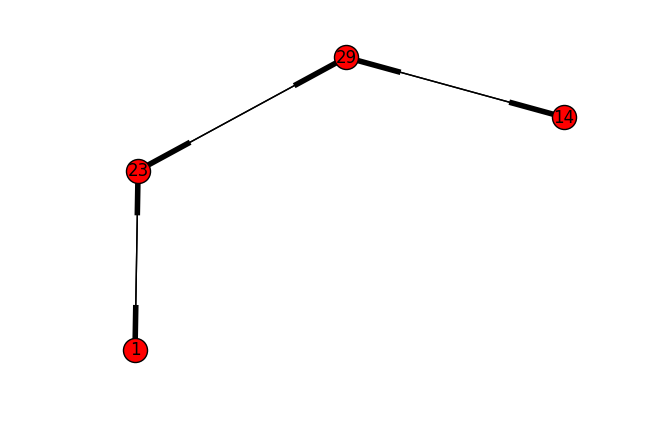

In [65]:
def extract_path_edges(G, source, target):
    if nx.has_path(G, source, target):
        shor = nx.shortest_path(G, source, target)
        newG = G.subgraph(shor)
        return newG

    else:
        raise Exception('Path does not exist between nodes {0} and {1}.'.format(source, target))
        
newG = extract_path_edges(G, 1, 14)
nx.draw(newG, with_labels=True)

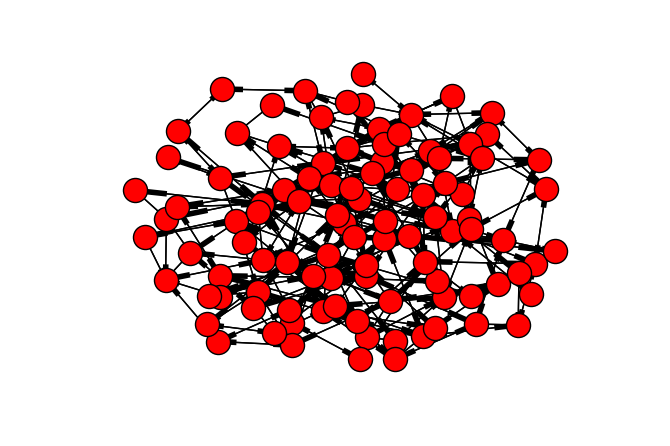

In [66]:
#df[min(df['nviews'])]
nx.draw(G)

In [67]:
df['nviews'].argmin()

276

In [68]:
df.ix[276]

id          OR6XwtjoKXo
nviews                6
rating                4
nrating               0
iniviews              6
eviews                9
Name: 276, dtype: object

In [69]:
#df[['nviews']]

# Let's propagate

### Request from node 97 for video 276

In [70]:
#df.ix[38,'nviews'] += 1
#df.ix[38,'eviews'] += 1
df.ix[276]

id          OR6XwtjoKXo
nviews                6
rating                4
nrating               0
iniviews              6
eviews                9
Name: 276, dtype: object

In [71]:
G.node[97]['Sharing_Rate']

0.859

In [72]:
random.seed(9004)
nodeSt = 97
rate = 0
pardaught = dict()
exclu = list()
connected = list()
queue = [nodeSt]
visited_nodes = set()
path = set()
connected.append(nodeSt)
for node in queue:
    if node == nodeSt:
        df.ix[276,'nviews'] += 1
        df.ix[276,'eviews'] += 1
        rate = randint(1,5)
        r = df.ix[276,'rating']
        df.ix[276,'rating'] = ((df.ix[276,'nrating'] * r) + rate)/float(df.ix[276,'nrating'] + 1)
        df.ix[276,'nrating'] += 1
        #print(G.node[node])
        neighbors = G.neighbors(node)
        #exclu = [n for n in neighbors if n not in visited_nodes]
        exclu = [n for n in neighbors if n not in connected]
        pardaught[node] = exclu
        #connected |= set(exclu)
        connected.extend(exclu)
        #queue.remove(node)
        visited_nodes.add(node)
        path.add(node)
        queue.extend(exclu)
        df.ix[276,'eviews'] += len(neighbors)
        print(str(node) + " viewed & shared")
    else:
        for key, values in pardaught.items():
            if node in values:
                parent = key
        if VwR_thr <= (df.ix[276,'rating']*G.node[node]['ViRt']*G.node[parent]['Attractiveness_Coeff']):
            df.ix[276,'nviews'] += 1
            df.ix[276,'eviews'] += 1
            print(str(node) + " viewed")
            rate = randint(1,5)
            r = df.ix[276,'rating']
            df.ix[276,'rating'] = ((df.ix[276,'nrating'] * r) + rate)/float(df.ix[276,'nrating'] + 1)
            df.ix[276,'nrating'] += 1
        if ShR_thr <= (df.ix[276,'rating']*G.node[node]['Sharing_Rate']*G.node[parent]['Attractiveness_Coeff']):
            #print(G.node[node])
            neighbors = G.neighbors(node)
            exclu = [n for n in neighbors if n not in connected]
            pardaught[node] = exclu
            connected.extend(exclu)
            #queue.remove(node)
            visited_nodes.add(node)
            path.add(node)
            queue.extend(exclu)
            df.ix[276,'eviews'] += len(neighbors)
            print(str(node) + " shared")

97 viewed & shared
32 viewed
32 shared
33 viewed
37 shared
65 viewed
73 viewed
73 shared
75 viewed
13 viewed
13 shared
18 viewed
9 viewed
25 viewed
94 viewed
57 viewed
1 shared
54 viewed
67 viewed


In [73]:
df.ix[276]

id          OR6XwtjoKXo
nviews               20
rating          2.42857
nrating              14
iniviews              6
eviews               68
Name: 276, dtype: object

In [74]:
lst = list()
for key, values in pardaught.items():
    lst.extend(values)
print(len(lst))
myset=set(lst)
print(len(myset))

31
31


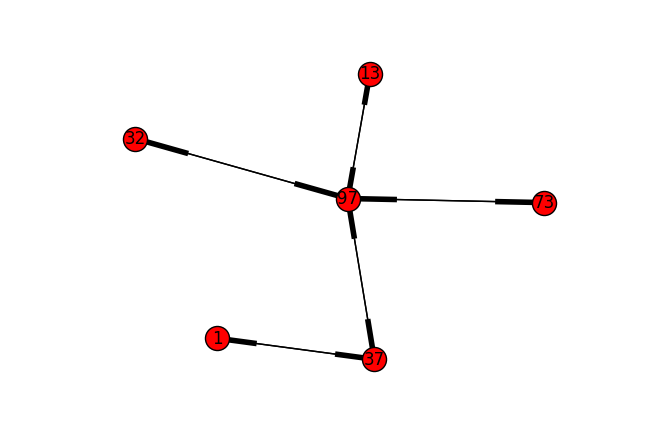

In [75]:
newG = G.subgraph(path)
nx.draw(newG, with_labels=True)

In [76]:
len(path)

6

### 100 requests with random recommendations

In [77]:
random.seed(5002)
for i in range(100):
    nodeSt = randint(0,99)
    rate = 0
    pardaught = dict()
    exclu = list()
    connected = list()
    queue = [nodeSt]
    visited_nodes = set()
    vid = randint(0,49)
    #print(vid)
    path = set()
    connected.append(nodeSt)
    for node in queue:
        if node == nodeSt:
            df.ix[vid,'nviews'] += 1
            df.ix[vid,'eviews'] += 1
            rate = randint(1,5)
            r = df.ix[vid,'rating']
            df.ix[vid,'rating'] = ((df.ix[vid,'nrating'] * r) + rate)/float(df.ix[vid,'nrating'] + 1)
            df.ix[vid,'nrating'] += 1
            #print(G.node[node])
            neighbors = G.neighbors(node)
            #exclu = [n for n in neighbors if n not in visited_nodes]
            exclu = [n for n in neighbors if n not in connected]
            pardaught[node] = exclu
            connected.extend(exclu)
            #queue.remove(node)
            visited_nodes.add(node)
            path.add(node)
            queue.extend(exclu)
            df.ix[vid,'eviews'] += len(neighbors)
            print(str(node) + " viewed & shared")
        else:
            for key, values in pardaught.items():
                if node in values:
                    parent = key
            if VwR_thr <= (df.ix[vid,'rating']*G.node[node]['ViRt']*G.node[parent]['Attractiveness_Coeff']):
                df.ix[vid,'nviews'] += 1
                df.ix[vid,'eviews'] += 1
                print(str(node) + " viewed")
                rate = randint(1,5)
                r = df.ix[vid,'rating']
                df.ix[vid,'rating'] = ((df.ix[vid,'nrating'] * r) + rate)/float(df.ix[vid,'nrating'] + 1)
                df.ix[vid,'nrating'] += 1
            if ShR_thr <= (df.ix[vid,'rating']*G.node[node]['Sharing_Rate']*G.node[parent]['Attractiveness_Coeff']):
                #print(G.node[node])
                neighbors = G.neighbors(node)
                exclu = [n for n in neighbors if n not in connected]
                pardaught[node] = exclu
                connected.extend(exclu)
                #queue.remove(node)
                visited_nodes.add(node)
                path.add(node)
                queue.extend(exclu)
                df.ix[vid,'eviews'] += len(neighbors)
                print(str(node) + " shared")

81 viewed & shared
56 viewed
4 viewed
4 shared
84 viewed
82 shared
59 viewed
96 shared
38 viewed
38 shared
87 shared
91 viewed
91 shared
28 shared
14 shared
17 viewed
51 shared
35 viewed
69 viewed
74 viewed
74 shared
10 viewed
76 viewed
66 viewed
66 shared
61 shared
2 viewed
55 viewed
60 viewed
11 viewed
11 shared
27 viewed
19 viewed
70 viewed
70 shared
7 viewed
7 shared
97 shared
30 shared
46 viewed
46 shared
13 viewed
13 shared
94 viewed
29 viewed
1 shared
44 viewed
18 viewed
18 shared
36 viewed
20 viewed
26 viewed
26 shared
50 viewed
50 shared
23 viewed
39 viewed
42 viewed
93 viewed
83 viewed
52 viewed
52 shared
6 viewed
6 shared
32 viewed
32 shared
33 viewed
37 shared
65 viewed
65 shared
73 viewed
73 shared
75 viewed
9 viewed
9 shared
25 viewed
68 viewed
68 shared
88 viewed
88 shared
16 viewed
67 viewed
57 viewed
57 shared
71 shared
99 viewed
99 shared
22 viewed
62 shared
80 viewed
80 shared
48 shared
86 viewed
15 viewed
34 shared
79 shared
5 viewed
5 shared
54 viewed
78 viewed
8 v

In [78]:
df.head(10)

,id,nviews,rating,nrating,iniviews,eviews
0,bG-a5ZSdO2I,21180,4.720000,418,21180,31770
1,46wXWDiigE8,13033,4.286420,486,12906,19987
2,X5h6xg7BcbQ,14541,4.553460,526,14477,22037
3,VKavlhLlZHc,1053,3.437303,89,988,1787
4,DgGZL_rAR8U,22288,4.320078,643,22156,33886
5,CIm4ci3Y6iM,19434,4.566596,805,19370,29373
6,GOrNw5IeEB8,51480,4.337150,842,51416,77433
7,LyuwSEYBAPg,528173,4.425800,3752,528109,792476
8,wzs4NzyWVB0,16071,3.928805,745,15837,24938
9,Z-ZP7Jt-RUM,16605,4.258787,544,16480,25328


In [79]:
df.tail()

,id,nviews,rating,nrating,iniviews,eviews
995,NWwrEEP8EBk,156873,4.38,326,156873,235309
996,pow5_UYKaJ8,157314,4.74,600,157314,235971
997,eQuIhJId1JY,265243,3.40,859,265243,397864
998,QF4CQeK91bk,25368,3.37,186,25368,38052
999,t2axP1lWFhg,125060,3.57,471,125060,187590


In [80]:
df['Expectation'] = df['eviews'] - df['nviews']

In [81]:
df.head(10)

,id,nviews,rating,nrating,iniviews,eviews,Expectation
0,bG-a5ZSdO2I,21180,4.720000,418,21180,31770,10590
1,46wXWDiigE8,13033,4.286420,486,12906,19987,6954
2,X5h6xg7BcbQ,14541,4.553460,526,14477,22037,7496
3,VKavlhLlZHc,1053,3.437303,89,988,1787,734
4,DgGZL_rAR8U,22288,4.320078,643,22156,33886,11598
5,CIm4ci3Y6iM,19434,4.566596,805,19370,29373,9939
6,GOrNw5IeEB8,51480,4.337150,842,51416,77433,25953
7,LyuwSEYBAPg,528173,4.425800,3752,528109,792476,264303
8,wzs4NzyWVB0,16071,3.928805,745,15837,24938,8867
9,Z-ZP7Jt-RUM,16605,4.258787,544,16480,25328,8723


In [82]:
expSum = df['Expectation'].sum()
print(expSum)

52418635


In [83]:
df['Probability'] = df['Expectation']/float(expSum)
df.head(10)

,id,nviews,rating,nrating,iniviews,eviews,Expectation,Probability
0,bG-a5ZSdO2I,21180,4.720000,418,21180,31770,10590,0.000202
1,46wXWDiigE8,13033,4.286420,486,12906,19987,6954,0.000133
2,X5h6xg7BcbQ,14541,4.553460,526,14477,22037,7496,0.000143
3,VKavlhLlZHc,1053,3.437303,89,988,1787,734,0.000014
4,DgGZL_rAR8U,22288,4.320078,643,22156,33886,11598,0.000221
5,CIm4ci3Y6iM,19434,4.566596,805,19370,29373,9939,0.000190
6,GOrNw5IeEB8,51480,4.337150,842,51416,77433,25953,0.000495
7,LyuwSEYBAPg,528173,4.425800,3752,528109,792476,264303,0.005042
8,wzs4NzyWVB0,16071,3.928805,745,15837,24938,8867,0.000169
9,Z-ZP7Jt-RUM,16605,4.258787,544,16480,25328,8723,0.000166


In [84]:
#for index, row in df.iterrows():
#    print(index, "", row['Probability'])

In [85]:
#vids = dict()
#for index, row in df.iterrows():
#    vids[index] = row['Probability']
#vids

In [86]:
#temp = tuple()
#vids2 = list()
#for index, row in df.iterrows():
#    temp = (index,row['Probability'])
#    vids2.append(temp)
#vids2

In [87]:
pdf = df.copy()
rdf = df.copy()

In [88]:
df.head(10)

,id,nviews,rating,nrating,iniviews,eviews,Expectation,Probability
0,bG-a5ZSdO2I,21180,4.720000,418,21180,31770,10590,0.000202
1,46wXWDiigE8,13033,4.286420,486,12906,19987,6954,0.000133
2,X5h6xg7BcbQ,14541,4.553460,526,14477,22037,7496,0.000143
3,VKavlhLlZHc,1053,3.437303,89,988,1787,734,0.000014
4,DgGZL_rAR8U,22288,4.320078,643,22156,33886,11598,0.000221
5,CIm4ci3Y6iM,19434,4.566596,805,19370,29373,9939,0.000190
6,GOrNw5IeEB8,51480,4.337150,842,51416,77433,25953,0.000495
7,LyuwSEYBAPg,528173,4.425800,3752,528109,792476,264303,0.005042
8,wzs4NzyWVB0,16071,3.928805,745,15837,24938,8867,0.000169
9,Z-ZP7Jt-RUM,16605,4.258787,544,16480,25328,8723,0.000166


In [89]:
pdf.head(10)

,id,nviews,rating,nrating,iniviews,eviews,Expectation,Probability
0,bG-a5ZSdO2I,21180,4.720000,418,21180,31770,10590,0.000202
1,46wXWDiigE8,13033,4.286420,486,12906,19987,6954,0.000133
2,X5h6xg7BcbQ,14541,4.553460,526,14477,22037,7496,0.000143
3,VKavlhLlZHc,1053,3.437303,89,988,1787,734,0.000014
4,DgGZL_rAR8U,22288,4.320078,643,22156,33886,11598,0.000221
5,CIm4ci3Y6iM,19434,4.566596,805,19370,29373,9939,0.000190
6,GOrNw5IeEB8,51480,4.337150,842,51416,77433,25953,0.000495
7,LyuwSEYBAPg,528173,4.425800,3752,528109,792476,264303,0.005042
8,wzs4NzyWVB0,16071,3.928805,745,15837,24938,8867,0.000169
9,Z-ZP7Jt-RUM,16605,4.258787,544,16480,25328,8723,0.000166


In [90]:
rdf.head(10)

,id,nviews,rating,nrating,iniviews,eviews,Expectation,Probability
0,bG-a5ZSdO2I,21180,4.720000,418,21180,31770,10590,0.000202
1,46wXWDiigE8,13033,4.286420,486,12906,19987,6954,0.000133
2,X5h6xg7BcbQ,14541,4.553460,526,14477,22037,7496,0.000143
3,VKavlhLlZHc,1053,3.437303,89,988,1787,734,0.000014
4,DgGZL_rAR8U,22288,4.320078,643,22156,33886,11598,0.000221
5,CIm4ci3Y6iM,19434,4.566596,805,19370,29373,9939,0.000190
6,GOrNw5IeEB8,51480,4.337150,842,51416,77433,25953,0.000495
7,LyuwSEYBAPg,528173,4.425800,3752,528109,792476,264303,0.005042
8,wzs4NzyWVB0,16071,3.928805,745,15837,24938,8867,0.000169
9,Z-ZP7Jt-RUM,16605,4.258787,544,16480,25328,8723,0.000166


In [91]:
df.ix[187]

id             fOIM1_xOSro
nviews             1543139
rating                4.53
nrating               2956
iniviews           1543139
eviews             2314708
Expectation         771569
Probability      0.0147194
Name: 187, dtype: object

In [92]:
pdf.ix[187]

id             fOIM1_xOSro
nviews             1543139
rating                4.53
nrating               2956
iniviews           1543139
eviews             2314708
Expectation         771569
Probability      0.0147194
Name: 187, dtype: object

In [93]:
rdf.ix[187]

id             fOIM1_xOSro
nviews             1543139
rating                4.53
nrating               2956
iniviews           1543139
eviews             2314708
Expectation         771569
Probability      0.0147194
Name: 187, dtype: object

In [94]:
vids3 = sorted([(index,row['Probability']) for index, row in pdf.iterrows()], key=lambda x: x[1], reverse=True)
vids3

[(652, 0.0783217838465271),
 (947, 0.0357552233094204),
 (958, 0.03485995009217619),
 (572, 0.029317817985912834),
 (605, 0.022866410008578055),
 (614, 0.022646259293093),
 (493, 0.021345099886710135),
 (969, 0.02127800542688683),
 (813, 0.021095017067880535),
 (761, 0.016433525977927507),
 (950, 0.015593118744889103),
 (953, 0.015398340685521475),
 (234, 0.015016548981101854),
 (187, 0.01471936459238208),
 (948, 0.013902880149397251),
 (974, 0.01288953823387427),
 (959, 0.01204537279538088),
 (968, 0.011945236651049766),
 (966, 0.011058567244263419),
 (961, 0.010638964559073314),
 (952, 0.010514199768841749),
 (16, 0.010179070859056135),
 (957, 0.010117413396972278),
 (304, 0.009989596257132602),
 (306, 0.00996578793018933),
 (300, 0.009678180288365005),
 (539, 0.008550031873206923),
 (963, 0.008319617632164591),
 (618, 0.008158415418486192),
 (962, 0.008019743360352669),
 (949, 0.007809169391763063),
 (44, 0.00767765127802355),
 (888, 0.00761423871491503),
 (967, 0.007377529002805968

In [95]:
b = vids3[0][1]
a = vids3[0][0]
print(b,a)

0.0783217838465271 652


### 10000 requests with Probabilistic recommendations

In [98]:
lst = list()
for i in range(10000):
    t = random.randint(0,10000)
    random.seed(t)
    nodeSt = randint(0,99)
    rate = 0
    pardaught = dict()
    exclu = list()
    connected = list()
    queue = [nodeSt]
    visited_nodes = set()
    vids = sorted([(index,row['Probability']) for index, row in pdf.iterrows()], key=lambda x: x[1], reverse=True)
    t = random.randint(0,10000)
    random.seed(t)
    temp = randint(0,20)
    vid = vids[temp][0]
    #print(vid)
    path = set()
    connected.append(nodeSt)
    lst.append(vid)
    #lst.append(pdf.ix[vid,'Probability'])
    for node in queue:
        if node == nodeSt:
            pdf.ix[vid,'nviews'] += 1
            pdf.ix[vid,'eviews'] += 1
            t = random.randint(0,10000)
            random.seed(t)
            rate = randint(1,5)
            r = pdf.ix[vid,'rating']
            pdf.ix[vid,'rating'] = ((pdf.ix[vid,'nrating'] * r) + rate)/float(pdf.ix[vid,'nrating'] + 1)
            pdf.ix[vid,'nrating'] += 1
            #print(G.node[node])
            neighbors = G.neighbors(node)
            #exclu = [n for n in neighbors if n not in visited_nodes]
            exclu = [n for n in neighbors if n not in connected]
            pardaught[node] = exclu
            connected.extend(exclu)
            #queue.remove(node)
            visited_nodes.add(node)
            path.add(node)
            queue.extend(exclu)
            pdf.ix[vid,'eviews'] += len(neighbors)
            #print(str(node) + " viewed & shared")
        else:
            for key, values in pardaught.items():
                if node in values:
                    parent = key
            if VwR_thr <= (pdf.ix[vid,'rating']*G.node[node]['ViRt']*G.node[parent]['Attractiveness_Coeff']):
                pdf.ix[vid,'nviews'] += 1
                pdf.ix[vid,'eviews'] += 1
                #print(str(node) + " viewed")
                rate = randint(1,5)
                r = pdf.ix[vid,'rating']
                pdf.ix[vid,'rating'] = ((pdf.ix[vid,'nrating'] * r) + rate)/float(pdf.ix[vid,'nrating'] + 1)
                pdf.ix[vid,'nrating'] += 1
            if ShR_thr <= (pdf.ix[vid,'rating']*G.node[node]['Sharing_Rate']*G.node[parent]['Attractiveness_Coeff']):
                #print(G.node[node])
                neighbors = G.neighbors(node)
                exclu = [n for n in neighbors if n not in connected]
                pardaught[node] = exclu
                connected.extend(exclu)
                #queue.remove(node)
                visited_nodes.add(node)
                path.add(node)
                queue.extend(exclu)
                pdf.ix[vid,'eviews'] += len(neighbors)
                #print(str(node) + " shared")
    pdf['Expectation'] = pdf['eviews'] - pdf['nviews']
    expSum = pdf['Expectation'].sum()
    pdf['Probability'] = pdf['Expectation']/float(expSum)
#lst.sort()
#print(lst)

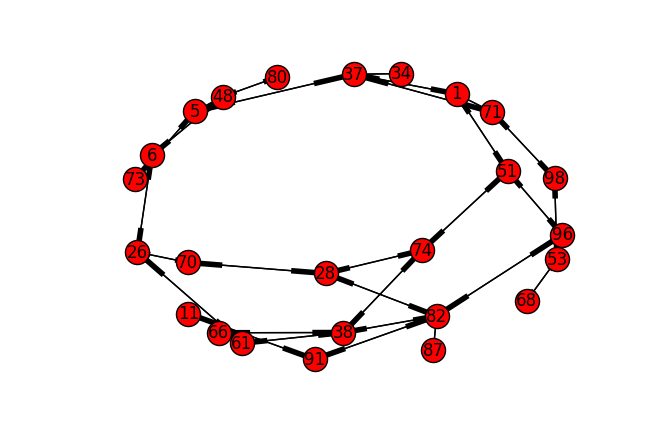

In [99]:
newG = G.subgraph(path)
nx.draw(newG, with_labels=True)

### 10000 requests with Random recommendations

In [100]:
lst2 = list()
for i in range(10000):
    nodeSt = randint(0,99)
    rate = 0
    pardaught = dict()
    exclu = list()
    connected = list()
    queue = [nodeSt]
    visited_nodes = set()
    
    lsttemp = list()
    t = randint(0,100000000)
    random.seed(t)
    temp = randint(0,999)
    while temp in lsttemp:
        temp = randint(0,999)
    lsttemp.append(temp)
    if len(lsttemp) == 200:
        lst2.extend(lsttemp)
        del lsttemp[:]
    vid = temp
    
    #vid = randint(0,999)
    #print(vid)
    path = set()
    connected.append(nodeSt)
    lst2.append(vid)
    for node in queue:
        if node == nodeSt:
            rdf.ix[vid,'nviews'] += 1
            rdf.ix[vid,'eviews'] += 1
            rate = randint(1,5)
            r = rdf.ix[vid,'rating']
            rdf.ix[vid,'rating'] = ((rdf.ix[vid,'nrating'] * r) + rate)/float(rdf.ix[vid,'nrating'] + 1)
            rdf.ix[vid,'nrating'] += 1
            #print(G.node[node])
            neighbors = G.neighbors(node)
            #exclu = [n for n in neighbors if n not in visited_nodes]
            exclu = [n for n in neighbors if n not in connected]
            pardaught[node] = exclu
            connected.extend(exclu)
            #queue.remove(node)
            visited_nodes.add(node)
            path.add(node)
            queue.extend(exclu)
            rdf.ix[vid,'eviews'] += len(neighbors)
            #print(str(node) + " viewed & shared")
        else:
            for key, values in pardaught.items():
                if node in values:
                    parent = key
            if VwR_thr <= (rdf.ix[vid,'rating']*G.node[node]['ViRt']*G.node[parent]['Attractiveness_Coeff']):
                rdf.ix[vid,'nviews'] += 1
                rdf.ix[vid,'eviews'] += 1
                #print(str(node) + " viewed")
                rate = randint(1,5)
                r = rdf.ix[vid,'rating']
                rdf.ix[vid,'rating'] = ((rdf.ix[vid,'nrating'] * r) + rate)/float(rdf.ix[vid,'nrating'] + 1)
                rdf.ix[vid,'nrating'] += 1
            if ShR_thr <= (rdf.ix[vid,'rating']*G.node[node]['Sharing_Rate']*G.node[parent]['Attractiveness_Coeff']):
                #print(G.node[node])
                neighbors = G.neighbors(node)
                exclu = [n for n in neighbors if n not in connected]
                pardaught[node] = exclu
                connected.extend(exclu)
                #queue.remove(node)
                visited_nodes.add(node)
                path.add(node)
                queue.extend(exclu)
                rdf.ix[vid,'eviews'] += len(neighbors)
                #print(str(node) + " shared")#    rdf['Expectation'] = rdf['eviews'] - rdf['nviews']    expSum = rdf['Expectation'].sum()    rdf['Probability'] = rdf['Expectation']/float(expSum)
#lst2.sort()
#print(lst2)
#print(path)

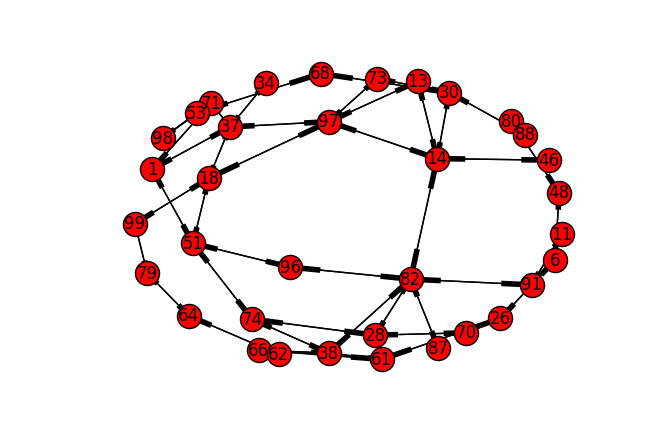

In [101]:
newG = G.subgraph(path)
nx.draw(newG, with_labels=True)

In [102]:
#common = [element for element in lst if element in lst2]
#common

In [103]:
pdf.head()

,id,nviews,rating,nrating,iniviews,eviews,Expectation,Probability
0,bG-a5ZSdO2I,21180,4.720000,418,21180,31770,10590,0.000192
1,46wXWDiigE8,13033,4.286420,486,12906,19987,6954,0.000126
2,X5h6xg7BcbQ,14541,4.553460,526,14477,22037,7496,0.000136
3,VKavlhLlZHc,1053,3.437303,89,988,1787,734,0.000013
4,DgGZL_rAR8U,22288,4.320078,643,22156,33886,11598,0.000211


In [104]:
df.head()

,id,nviews,rating,nrating,iniviews,eviews,Expectation,Probability
0,bG-a5ZSdO2I,21180,4.720000,418,21180,31770,10590,0.000202
1,46wXWDiigE8,13033,4.286420,486,12906,19987,6954,0.000133
2,X5h6xg7BcbQ,14541,4.553460,526,14477,22037,7496,0.000143
3,VKavlhLlZHc,1053,3.437303,89,988,1787,734,0.000014
4,DgGZL_rAR8U,22288,4.320078,643,22156,33886,11598,0.000221


In [105]:
rdf.head()

,id,nviews,rating,nrating,iniviews,eviews,Expectation,Probability
0,bG-a5ZSdO2I,21610,3.795943,848,21180,33955,10590,0.000202
1,46wXWDiigE8,13448,3.673918,901,12906,22092,6954,0.000133
2,X5h6xg7BcbQ,14923,3.925242,908,14477,23950,7496,0.000143
3,VKavlhLlZHc,1409,3.107685,445,988,3319,734,0.000014
4,DgGZL_rAR8U,22706,3.790584,1061,22156,35945,11598,0.000221


In [106]:
df.ix[493]

id             kdWrCTMuQ1M
nviews             2237763
rating                4.15
nrating               1793
iniviews           2237763
eviews             3356644
Expectation        1118881
Probability      0.0213451
Name: 493, dtype: object

In [107]:
pdf.ix[493]

id             kdWrCTMuQ1M
nviews             2266365
rating             3.05438
nrating              30395
iniviews           2237763
eviews             3481034
Expectation        1214669
Probability      0.0220622
Name: 493, dtype: object

In [108]:
rdf.ix[493]

id             kdWrCTMuQ1M
nviews             2238176
rating             3.93107
nrating               2206
iniviews           2237763
eviews             3358754
Expectation        1118881
Probability      0.0213451
Name: 493, dtype: object

In [109]:
vidsdf = sorted([(index,row['nviews']) for index, row in df.iterrows()], key=lambda x: x[1], reverse=True)
vidspdf = sorted([(index,row['nviews']) for index, row in pdf.iterrows()], key=lambda x: x[1], reverse=True)
vidsrdf = sorted([(index,row['nviews']) for index, row in rdf.iterrows()], key=lambda x: x[1], reverse=True)

In [110]:
lstdf = [b for a,b in vidsdf]
lstpdf = [b for a,b in vidspdf]
lstrdf = [b for a,b in vidsrdf]

In [111]:
krange = list(range(1,len(lstdf) + 1))

In [137]:
#plt.plot(krange,lstdf)
#plt.xlabel('Rank')
#plt.ylabel('Number of views')

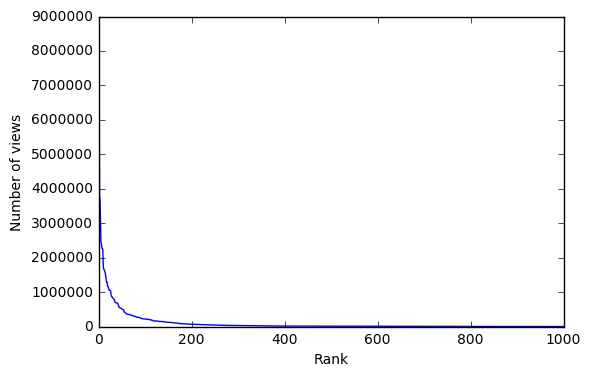

In [113]:
plt.plot(krange,lstpdf)
plt.xlabel('Rank')
plt.ylabel('Number of views')

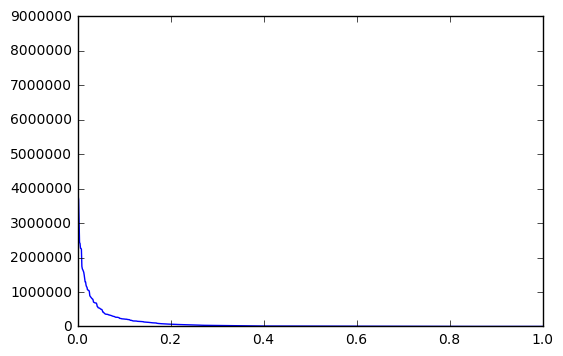

In [114]:
import numpy as np
plt.plot(np.linspace(0,1, len(krange)), lstpdf)

In [115]:
 pdf['diff'] = pdf['nviews'] - pdf['iniviews']

In [116]:
vidspdfdiff = sorted([(index,row['diff']) for index, row in pdf.iterrows()], key=lambda x: x[1], reverse=True)

In [117]:
lstpdfdiff = [b for a,b in vidspdfdiff]

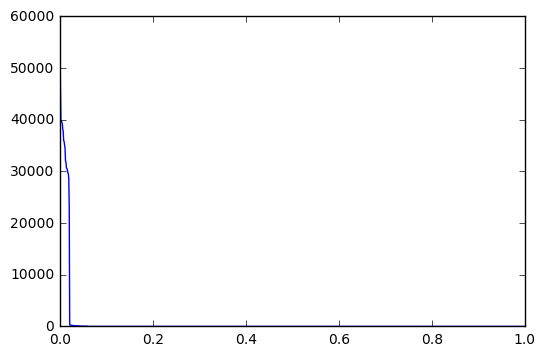

In [118]:
plt.plot(np.linspace(0,1, len(krange)), lstpdfdiff)

In [119]:
sum = 0
#lstpdfdiff.reverse()

In [120]:
for i in range(len(lstpdfdiff)):
    temp = lstpdfdiff[i]
    lstpdfdiff[i] = lstpdfdiff[i] + sum
    sum += temp

In [121]:
#lstpdfdiff.reverse()

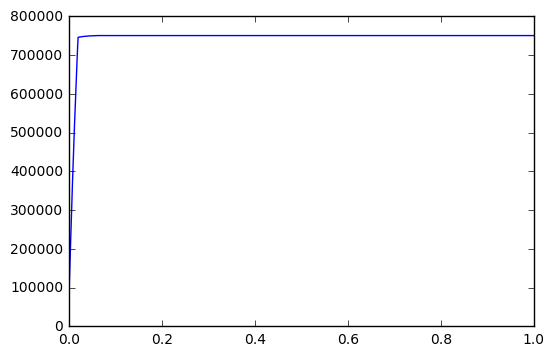

In [122]:
plt.plot(np.linspace(0,1, len(krange)), lstpdfdiff)

In [136]:
#print(lstpdfdiff)

In [124]:
#plt.plot(krange,lstrdf)
#plt.xlabel('Rank')
#plt.ylabel('Number of views')

In [125]:
#len(set(lst2))

In [126]:
#diffpdf = pd.DataFrame()
#diffpdf['nviews'] = pdf['nviews'] - df['nviews']

In [127]:
#diffrdf = pd.DataFrame()
#diffrdf['nviews'] = rdf['nviews'] - df['nviews']

In [128]:
#vids2pdf = sorted([(index,row['nviews']) for index, row in pdf.iterrows()], key=lambda x: x[1], reverse=True)
#vids2rdf = sorted([(index,row['nviews']) for index, row in rdf.iterrows()], key=lambda x: x[1], reverse=True)

In [129]:
#lst2pdf = [b for a,b in vids2pdf]
#lst2rdf = [b for a,b in vids2rdf]

In [130]:
#plt.plot(krange,lst2pdf)
#plt.xlabel('Rank')
#plt.ylabel('Number of views')

In [131]:
#plt.plot(krange,lst2rdf)
#plt.xlabel('Rank')
#plt.ylabel('Number of views')

In [132]:
#print(vidsdf)

In [133]:
#print(vidspdf)

In [134]:
#print(vidsrdf)

In [135]:
#plt.plot(lstpdf, krange)
#plt.xlabel('Number of views')
#plt.ylabel('Rank')